## Introduction





In this Exploratory Data Analysis (EDA) notebook, I delve into the critical task of optimizing the selection of trial sites for clinical trials, focusing specifically on identifying high-quality hospitals and private practices. The overarching goal is to enhance the efficiency and effectiveness of clinical trials and speed up their timeline by ensuring that selected sites meet stringent quality standards and align with clinical trial specifications. To this end, I will leverage four distinct datasets containing detailed information on global trials, encompassing country demographics, trial targets, trial site specifics, and trial criteria.

The datasets at my disposal offer a wealth of variables, from country-specific healthcare infrastructure metrics to trial-specific enrolment figures and site characteristics. By carefully analyzing these datasets, I will explore potential quality measures for trial sites and lay the groundwork for the development of a robust model to predict site quality. This endeavor is not only crucial for streamlining the trial design and execution process but also for advancing the overall success and reliability of clinical trials.



## Setup

In [1]:
# TODO: Rearrange imports
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sys.path.append('..')  # Adjust the path to ensure it correctly points to the project root.

from src.data.dataloader import load_country_data, load_target_data, load_trial_site_data, load_trial_data

ModuleNotFoundError: No module named 'src.data.data_loader'

## Data

In [2]:
# Load the data.
df_country = load_country_data(clean=False)
df_target = load_target_data(clean=False)
df_trial_site = load_trial_site_data(clean=False)
df_trial = load_trial_data(clean=False)

print("COUNTRY DATA:")
display(df_country.info())
display(df_country.head())
display(df_country.describe())

print("\n\n\nTARGET DATA:")
display(df_target.info())
display(df_target.head())
display(df_target.describe())

print("\n\n\nTRIAL SITE DATA:")
display(df_trial_site.info())
display(df_trial_site.head())
display(df_trial_site.describe())

print("\n\n\nTRIAL DATA:")
display(df_trial.info())
display(df_trial.head())
display(df_trial.describe())


COUNTRY DATA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 35 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   country_id                                                                   50 non-null     object 
 1   nn_region                                                                    48 non-null     object 
 2   population                                                                   49 non-null     float64
 3   share_of_female_youth_unemployment                                           1 non-null      float64
 4   share_of_male_youth_unemployment                                             1 non-null      float64
 5   oecd_pharma_expenditure_per_capita                                           37 non-null     float64
 6   oecd_medical_grads_per_1k     

None

,country_id,nn_region,population,share_of_female_youth_unemployment,share_of_male_youth_unemployment,oecd_pharma_expenditure_per_capita,oecd_medical_grads_per_1k,oecd_MDs_per_1k,oecd_hospital_beds_per_1k,oecd_MR_units_per_1m,...,who_gho_gdo_q35_est_pop_prev_depression,who_gho_whosis_000001_life_expec_at_birth_w,who_gho_NCD_BMI_30A_obesity_prevalence_adults,who_gho_ghed_oopsche_sha2011_oop_expenditure_pct_current_health_expenditure,who_gho_ghed_che_pc_us_sha2011_curr_health_exp_per_capita_usd,who_gho_ghed_che_pc_ppp_sha2011_curr_health_exp_per_capita_ppp,who_gho_ghed_chegdp_sha2011_curr_health_exp_perc_gdp,who_gho_sdgpm25_pm25_concentration_val,who_gho_air_90_air_pollution_dalys_val,who_gho_hwf_0025_prc_female_medical_doctors
0,DEU,Germany,81776930.0,NaN,NaN,662.0,12.0,3.0,8.0,27.0,...,5.19315,80.16794,19.9,13.96,4611.81,4320.84,11.10,11.71044,341.83661,42.457
1,BRA,LATAM,195713637.0,NaN,NaN,248.0,NaN,1.0,2.0,5.0,...,5.75637,74.09258,19.2,29.39,896.70,1137.78,7.95,11.49020,590.99677,40.337
2,TWN,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,North America,309327143.0,NaN,NaN,986.0,6.0,2.0,3.0,31.0,...,5.85717,78.56299,32.3,12.25,7930.15,7930.15,16.35,7.55348,333.04617,31.755
4,ISR,SEEMEA,7623600.0,NaN,NaN,269.0,4.0,3.0,3.0,2.0,...,4.61045,81.55505,24.2,23.81,2234.95,2101.58,7.02,19.46223,320.49954,41.066


,population,share_of_female_youth_unemployment,share_of_male_youth_unemployment,oecd_pharma_expenditure_per_capita,oecd_medical_grads_per_1k,oecd_MDs_per_1k,oecd_hospital_beds_per_1k,oecd_MR_units_per_1m,oecd_pte_units_total,oecd_hypnotics_sedatives_per_1k,...,who_gho_gdo_q35_est_pop_prev_depression,who_gho_whosis_000001_life_expec_at_birth_w,who_gho_NCD_BMI_30A_obesity_prevalence_adults,who_gho_ghed_oopsche_sha2011_oop_expenditure_pct_current_health_expenditure,who_gho_ghed_che_pc_us_sha2011_curr_health_exp_per_capita_usd,who_gho_ghed_che_pc_ppp_sha2011_curr_health_exp_per_capita_ppp,who_gho_ghed_chegdp_sha2011_curr_health_exp_perc_gdp,who_gho_sdgpm25_pm25_concentration_val,who_gho_air_90_air_pollution_dalys_val,who_gho_hwf_0025_prc_female_medical_doctors
count,4.900000e+01,1.0,1.0,37.000000,32.000000,34.000000,37.000000,31.000000,27.000000,24.000000,...,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,41.000000
mean,9.443743e+07,1.0,2.0,458.918919,10.093750,2.382353,4.405405,10.870968,111.518519,14.750000,...,4.883237,76.841678,18.740816,25.343878,2317.808776,2307.489184,7.725918,18.659551,682.131898,47.006951
std,2.550349e+08,NaN,NaN,180.064090,3.236479,1.073502,2.671448,10.177563,311.218371,14.522097,...,0.566825,4.894360,7.387741,13.179156,2261.576272,1684.656191,2.569098,14.351418,560.841060,14.273183
min,1.331475e+06,1.0,2.0,120.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.342900,57.143310,1.400000,8.510000,45.130000,145.470000,3.200000,5.882970,144.038040,14.239000
25%,7.623600e+06,1.0,2.0,346.000000,8.000000,2.000000,2.000000,5.000000,5.000000,5.000000,...,4.568470,74.204360,17.700000,15.230000,545.290000,1057.450000,5.980000,11.487840,296.398160,37.676000
50%,2.203175e+07,1.0,2.0,463.000000,10.500000,2.500000,4.000000,7.000000,17.000000,11.000000,...,4.881860,77.284280,19.800000,20.550000,1296.540000,1878.510000,7.740000,15.149440,548.043340,45.241000
75%,6.502750e+07,1.0,2.0,561.000000,12.000000,3.000000,6.000000,15.000000,59.500000,17.250000,...,5.156700,80.583660,23.500000,34.020000,4249.600000,3562.180000,9.520000,20.076350,903.730770,55.814000
max,1.337705e+09,1.0,2.0,986.000000,20.000000,5.000000,13.000000,46.000000,1570.000000,54.000000,...,5.940260,82.681620,32.300000,65.180000,7930.150000,7930.150000,16.350000,78.384860,3037.958980,74.219000





TARGET DATA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trial_id          1331 non-null   object 
 1   site_id           1331 non-null   object 
 2   no_of_patients    1232 non-null   float64
 3   enrolment_months  1144 non-null   float64
dtypes: float64(2), object(2)
memory usage: 41.7+ KB


None

,trial_id,site_id,no_of_patients,enrolment_months
0,trial_0,site_0,1.0,0.228995
1,trial_1,site_1,20.0,NaN
2,trial_1,site_2,31.0,NaN
3,trial_1,site_3,7.0,13.576580
4,trial_2,site_4,3.0,13.556150


,no_of_patients,enrolment_months
count,1232.000000,1144.000000
mean,8.036526,7.932271
std,12.213420,6.603582
min,0.000000,-0.306510
25%,2.000000,1.948659
50%,4.000000,6.978005
75%,9.000000,12.942249
max,173.000000,26.381913





TRIAL SITE DATA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   trial_id         1331 non-null   object
 1   site_id          1331 non-null   object
 2   country_id       1331 non-null   object
 3   site_start_date  1331 non-null   object
 4   site_end_date    1331 non-null   object
 5   site_type        1331 non-null   object
dtypes: object(6)
memory usage: 62.5+ KB


None

,trial_id,site_id,country_id,site_start_date,site_end_date,site_type
0,trial_0,site_0,DEU,2017-01-30,2019-04-15,Practitioner
1,trial_1,site_1,BRA,2018-05-07,2022-04-03,Other
2,trial_1,site_2,TWN,2018-04-29,2022-03-26,Academic
3,trial_1,site_3,USA,2018-05-07,2020-02-04,Practitioner
4,trial_2,site_4,ISR,2018-04-22,2020-06-26,Academic


,trial_id,site_id,country_id,site_start_date,site_end_date,site_type
count,1331,1331,1331,1331,1331,1331
unique,16,1067,50,215,813,3
top,trial_4,site_334,USA,2013-06-17,2019-04-15,Other
freq,447,6,270,32,7,649





TRIAL DATA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trial_id               16 non-null     object 
 1   exclusion_criteria     16 non-null     object 
 2   inclusion_criteria     16 non-null     object 
 3   trial_phase            16 non-null     object 
 4   maximum_age            16 non-null     float64
 5   minimum_age            16 non-null     float64
 6   is_novo_nordisk_trial  16 non-null     int64  
 7   is_top_20_sponsor      16 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 1.1+ KB


None

,trial_id,exclusion_criteria,inclusion_criteria,trial_phase,maximum_age,minimum_age,is_novo_nordisk_trial,is_top_20_sponsor
0,trial_0,Any prior measurement of LVEF <or= 40% under s...,Left ventricular ejection fraction (LVEF) >40%...,III,0.0,45.0,0,1
1,trial_1,Receiving therapy with an SGLT2 inhibitor with...,Provision of signed informed consent prior to ...,III,130.0,40.0,0,0
2,trial_2,Premature discontinuation of study treatment i...,Signed and dated Informed Consent Form (ICF).\...,II,0.0,18.0,0,0
3,trial_3,A self-reported change in body weight above 5 ...,"- Male or female, age above or equal to 18 yea...",III,0.0,18.0,1,1
4,trial_4,- Any prior measurement of LVEF < 40%. \n-Acut...,-Written informed consent must be obtained bef...,III,0.0,50.0,0,1


,maximum_age,minimum_age,is_novo_nordisk_trial,is_top_20_sponsor
count,16.000000,16.000000,16.000000,16.000
mean,59.750000,29.812500,0.125000,0.625
std,57.678997,14.652503,0.341565,0.500
min,0.000000,18.000000,0.000000,0.000
25%,0.000000,18.000000,0.000000,0.000
50%,74.500000,18.000000,0.000000,1.000
75%,99.250000,40.000000,0.000000,1.000
max,150.000000,60.000000,1.000000,1.000


## Univariate Analysis

In [3]:
def visualize_histogram(df: pd.DataFrame, var_name: str, var_label: str, kde: bool = True, bins: int = 10):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var_name], kde=kde, bins=bins)
    plt.title(f'Distribution of {var_label}')
    plt.xlabel(f'{var_label}')
    plt.ylabel('Frequency')
    plt.show()

def visualize_barplot(df: pd.DataFrame, var_name: str, var_label: str, title: str):
    counts = df[var_name].value_counts().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts.index, y=counts.values, order=counts.index)
    plt.title(f'{title}')
    plt.xlabel('Trial ID')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


In [4]:
# Trial Details (df_target & df_trial). Histograms for no_of_patients, enrolment_months, maximum_age, minimum_age.


# Count plots for categorical variables like trial_phase, site_type, is_novo_nordisk_trial.


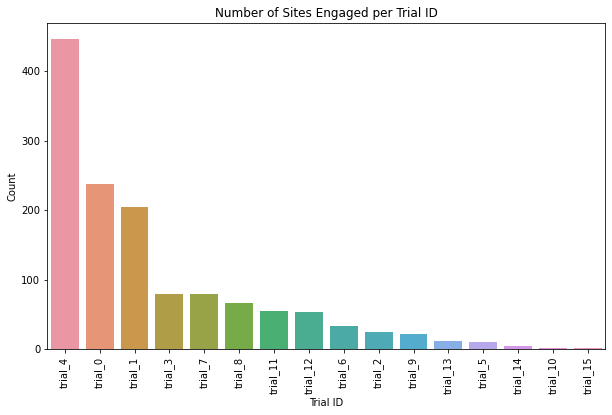

In [5]:
visualize_barplot(df=df_target, 
                  var_name="trial_id", 
                  var_label="Trial ID", 
                  title="Number of Sites Engaged per Trial ID")

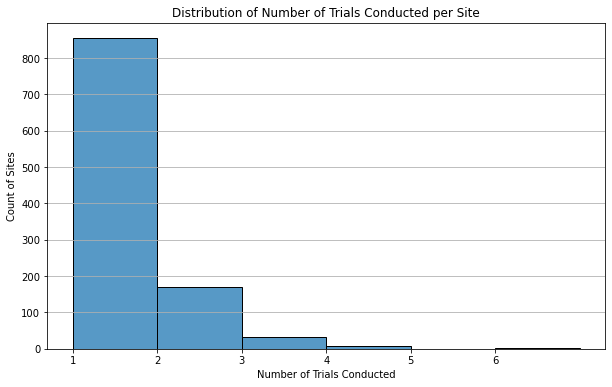

,trial_id,site_id,no_of_patients,enrolment_months,no_of_trials
0,trial_0,site_0,1.0,0.228995,1
1,trial_1,site_1,20.0,NaN,2
2,trial_1,site_2,31.0,NaN,1
3,trial_1,site_3,7.0,13.576580,1
4,trial_2,site_4,3.0,13.556150,3


In [6]:
# Calculate the number of times each site has conducted a trial
site_trial_counts = df_target['site_id'].value_counts().rename('no_of_trials')

# Merge this count back into the original DataFrame
df_target = df_target.merge(site_trial_counts, how='left', left_on='site_id', right_index=True)

# Plot the distribution of the number of trials conducted per site
plt.figure(figsize=(10, 6))
sns.histplot(site_trial_counts.values, kde=False, bins=range(1, site_trial_counts.max() + 2))
plt.title('Distribution of Number of Trials Conducted per Site')
plt.xlabel('Number of Trials Conducted')
plt.ylabel('Count of Sites')
plt.xticks(range(1, site_trial_counts.max() + 1))  # Ensure ticks represent integer values
plt.grid(axis='y')
plt.show()

# Display the updated DataFrame
df_target.head()


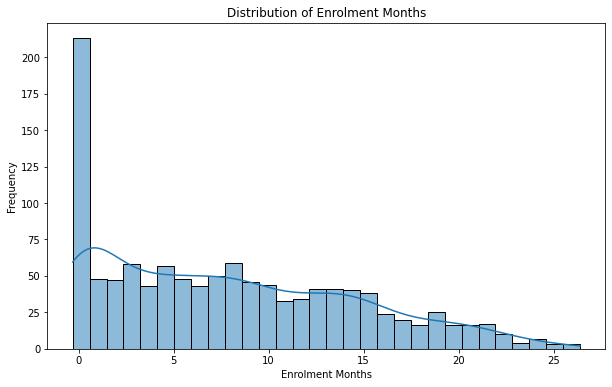

In [7]:
visualize_histogram(df_target, "enrolment_months", "Enrolment Months", True, 30)

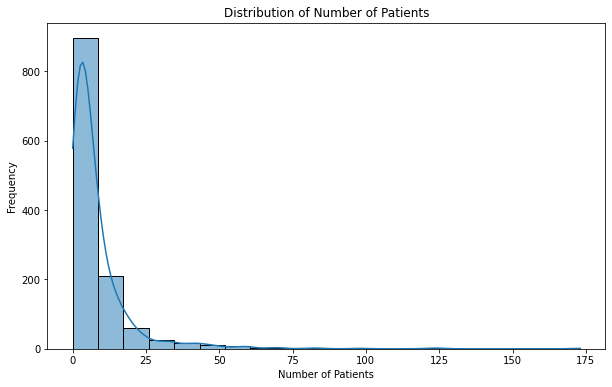

In [8]:
visualize_histogram(df_target, "no_of_patients", "Number of Patients", kde=True, bins=20)

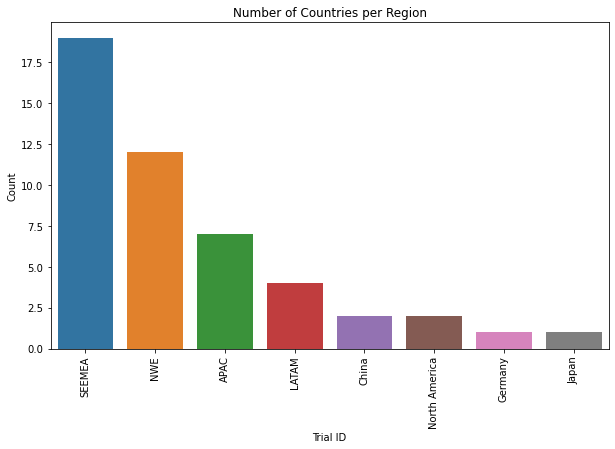

In [9]:
visualize_barplot(df=df_country, 
                  var_name="nn_region", 
                  var_label="Region", 
                  title="Number of Countries per Region")

In [21]:
print("SAMPLE TRIAL INCLUSION CRITERIA:")
for inclusion_criteria in df_trial["inclusion_criteria"].sample(3):
    print(f"{inclusion_criteria}\n\n") 

print("SAMPLE TRIAL EXCLUSION CRITERIA:")
for exclusion_criteria in df_trial["exclusion_criteria"].sample(3):
    print(f"{exclusion_criteria}\n\n") 

SAMPLE TRIAL INCLUSION CRITERIA:
Left ventricular ejection fraction (LVEF) >40% by echo within 6 months prior to study entry or during the screening epoch
Symptom(s) of heart failure (HF) requiring treatment with diuretics (including loop, or thiazide diuretics, or mineralocorticoid antagonist [MRAs]) for at least 30 days prior to study entry
NYHA class II-IV
Structural heart disease (left atrial enlargement or left ventricular hypertrophy) documented by echocardiogram.
NT-proBNP > 220 pg/mL for patients with no atrial fibrillation/atrial flutter (AF) or > 600 pg/mL for patients with AF
KCCQ clinical summary score < 75
Patients on ACEi or ARB therapy must have a history of HTN
Other protocol-defined inclusion criteria may apply.


Participants must meet the following criteria to be enrolled in this proof-of-concept study:

Age 18 to 85 years
Clinical diagnosis of HFpEF:

Left ventricular ejection fraction > or = 50%, with no history of LVEF below 45%

Demonstrated Cpc-PH by all of the 

## Multivariate Analysis

In [ ]:
# Correlation heatmap for continuous variables in df_country.

# Scatter plots to explore relationships between enrolment metrics (no_of_patients, enrolment_months) and trial site characteristics (like site_type, country_id related demographics).

# Box plots to compare the distribution of key metrics across different site_type categories.

# Violin plots for trial_id, site_id, no_of_patients

# Violin plots for nn_region, oecd_pharma_expenditure_per_capita

# How many trials does one site participate in? What's the distribution of recruited patients per site?

# Correlation between df_target no_of_patients, enrolment_months

### Missing Values

In [10]:
# Missing values analysis.
# Group by 'trial_id' and calculate the percentage of missing values for each column
missing_percentage = df_target.groupby('trial_id').apply(lambda x: pd.Series({
    'perc_missing_no_of_patients': x['no_of_patients'].isnull().mean() * 100,
    'perc_missing_enrolment_months': x['enrolment_months'].isnull().mean() * 100
})).reset_index()

# Display the result
print(missing_percentage)

    trial_id  perc_missing_no_of_patients  perc_missing_enrolment_months
0    trial_0                     0.420168                       0.000000
1    trial_1                     0.980392                      33.333333
2   trial_10                   100.000000                     100.000000
3   trial_11                     5.454545                       0.000000
4   trial_12                     1.886792                       0.000000
5   trial_13                     0.000000                       0.000000
6   trial_14                   100.000000                     100.000000
7   trial_15                   100.000000                     100.000000
8    trial_2                     0.000000                       0.000000
9    trial_3                     0.000000                      28.750000
10   trial_4                     1.789709                       0.000000
11   trial_5                     0.000000                       0.000000
12   trial_6                     0.000000          

### Trial Durations

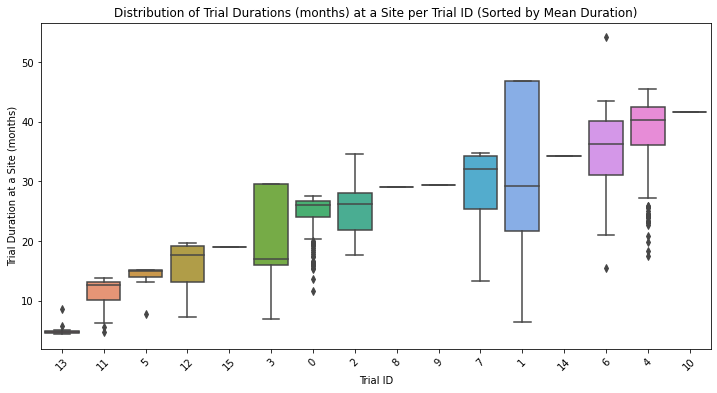

In [34]:
df_trial_site = load_trial_site_data(clean=True)

# Calculate the duration for each trial at each site. Convert site_trial_duration from days to months.
df_trial_site['site_trial_duration_months'] = (df_trial_site['site_end_date'] - 
                                               df_trial_site['site_start_date'])\
                                                .dt.days / 30.44

# Calculate the mean monthly duration per trial_id
mean_monthly_durations = df_trial_site.groupby('trial_id')['site_trial_duration_months'].mean().reset_index()

# Sort the trial_ids by mean monthly duration
sorted_trial_ids_by_month = mean_monthly_durations.sort_values(by='site_trial_duration_months')['trial_id']

# Visualize the temporal distribution of monthly trial durations per trial_id, sorted by mean monthly duration
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_trial_site, x='trial_id', y='site_trial_duration_months', order=sorted_trial_ids_by_month)
plt.title('Distribution of Trial Durations (months) at a Site per Trial ID (Sorted by Mean Duration)')
plt.xlabel('Trial ID')
plt.ylabel('Trial Duration at a Site (months)')
plt.xticks(rotation=45)  # Rotate the x labels for better readability if necessary
plt.show()


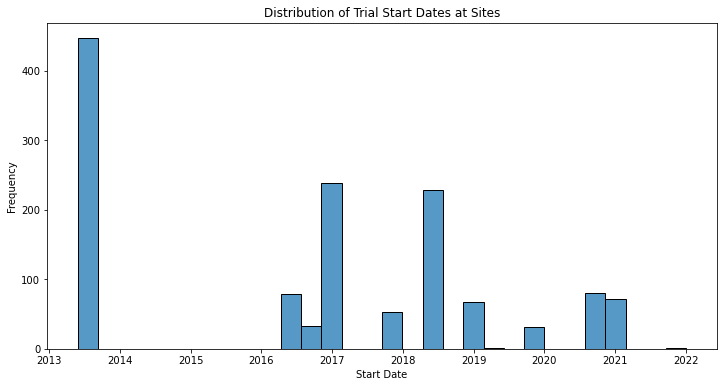

In [14]:
# Visualize the distribution of start dates
plt.figure(figsize=(12, 6))
sns.histplot(df_trial_site['site_start_date'], bins=30)
plt.title('Distribution of Trial Start Dates at Sites')
plt.xlabel('Start Date')
plt.ylabel('Frequency')
plt.show()

### Invalid trial site enrolment durations

In [16]:
# Check for negative values in 'no_of_patients' and 'enrolment_months'
negative_no_of_patients = df_target[df_target['no_of_patients'] < 0]
negative_enrolment_months = df_target[df_target['enrolment_months'] < 0]

# Display the entries with negative values, if any
print("Entries with negative values in 'no_of_patients':")
display(negative_no_of_patients)

print("\nEntries with negative values in 'enrolment_months':")
display(negative_enrolment_months)
display(negative_enrolment_months[["no_of_patients", "enrolment_months"]].describe())

# Display the number of rows before and after cleaning
print(f"Number of rows before dropping negative months values: {len(df_target)}")
df_target_cleaned = df_target.loc[~(df_target['enrolment_months'] < 0)]
print(f"Number of rows after dropping negative months values: {len(df_target_cleaned)}")

# Load the loaded dataset again
df_target = load_target_data(clean=True)

Entries with negative values in 'no_of_patients':


,trial_id,site_id,no_of_patients,enrolment_months,no_of_trials



Entries with negative values in 'enrolment_months':


,trial_id,site_id,no_of_patients,enrolment_months,no_of_trials
5,trial_3,site_5,0.0,-0.031283,1
29,trial_0,site_29,2.0,-0.105928,2
58,trial_0,site_58,2.0,-0.227622,2
136,trial_3,site_133,1.0,-0.065005,3
150,trial_12,site_147,0.0,-0.034860,1
...,...,...,...,...,...
1283,trial_0,site_1034,0.0,-0.138330,1
1287,trial_12,site_1037,1.0,-0.108971,1
1297,trial_0,site_1015,3.0,-0.121690,2
1319,trial_6,site_1057,2.0,-0.047310,1


,no_of_patients,enrolment_months
count,81.000000,83.000000
mean,1.061728,-0.079859
std,0.856529,0.071892
min,0.000000,-0.306510
25%,0.000000,-0.113367
50%,1.000000,-0.055722
75%,2.000000,-0.025036
max,3.000000,-0.002013


Number of rows before dropping negative months values: 1331
Number of rows after dropping negative months values: 1248


### Patient enrolment and speed

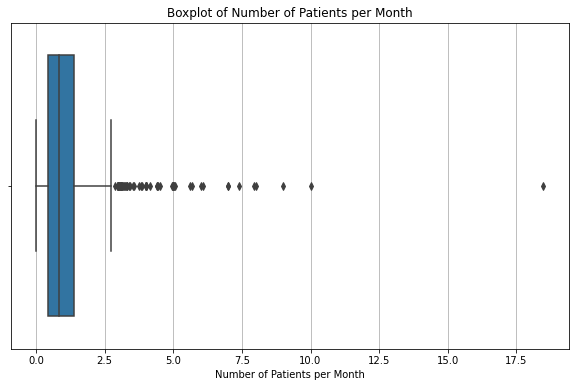

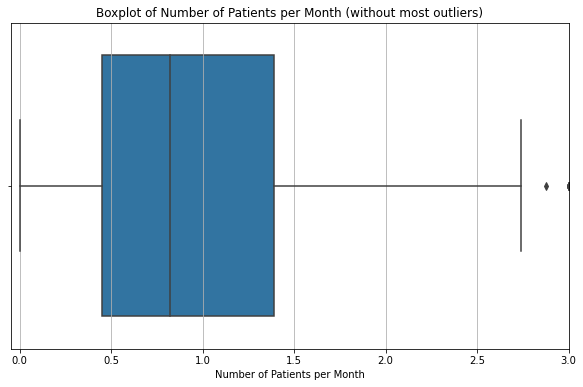

In [45]:
# Calculate the number of patients enrolled per month, treating any enrolment_months less than a full month as a full month
df_target['patients_enroled_per_month'] = np.where(
    df_target['enrolment_months'] < 1,
    df_target['no_of_patients'],
    df_target['no_of_patients'] / df_target['enrolment_months'])

# Drop NA values for visualization purposes
df_target_clean = df_target.dropna(subset=['patients_enroled_per_month'])

# Visualize the distribution of 'patients_enroled_per_month' using a horizontal boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_target_clean, x='patients_enroled_per_month', orient='h')
plt.title('Boxplot of Number of Patients Enroled per Month')
plt.xlabel('Number of Patients per Month')
plt.grid(axis='x')
plt.show()

# Visualize the distribution of 'patients_enroled_per_month' using a horizontal boxplot with restricted x-axis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_target_clean, x='no_of_patients_per_month', orient='h')
plt.title('Boxplot of Number of Patients Enroled per Month (without most outliers)')
plt.xlabel('Number of Patients per Month')
plt.grid(axis='x')
# Restrict the x-axis to eliminate outliers
plt.xlim(-0.05, 3)
plt.show()


### Patient treatment and speed

In [51]:
# Join dfs on 'trial_id' and 'site_id'
df_merged = pd.merge(df_trial_site, df_target, on=['trial_id', 'site_id'], how='inner')

,trial_id,site_id,no_of_patients,enrolment_months,no_of_patients_per_month,patients_enroled_per_month
0,0,0,1.0,0.228995,1.000000,1.000000
1,1,1,20.0,NaN,NaN,NaN
2,1,2,31.0,NaN,NaN,NaN
3,1,3,7.0,13.576580,0.515594,0.515594
4,2,4,3.0,13.556150,0.221302,0.221302
...,...,...,...,...,...,...
1326,1,1063,68.0,NaN,NaN,NaN
1327,4,1064,4.0,4.927081,0.811840,0.811840
1328,6,1065,2.0,0.039459,2.000000,2.000000
1329,5,1066,1.0,0.083982,1.000000,1.000000


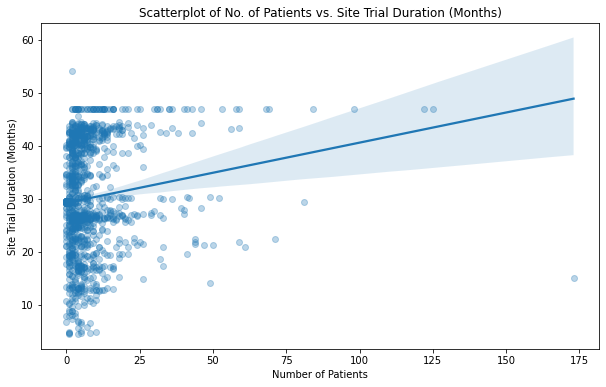

In [63]:
# Plot Scatterplot between no_of_patients and site_trial_duration_months
plt.figure(figsize=(10, 6))
sns.regplot(data=df_merged, x='no_of_patients', y='site_trial_duration_months',
            scatter_kws=dict(alpha=0.3))
plt.title('Scatterplot of No. of Patients vs. Site Trial Duration (Months)')
plt.xlabel('Number of Patients')
plt.ylabel('Site Trial Duration (Months)')
plt.show()

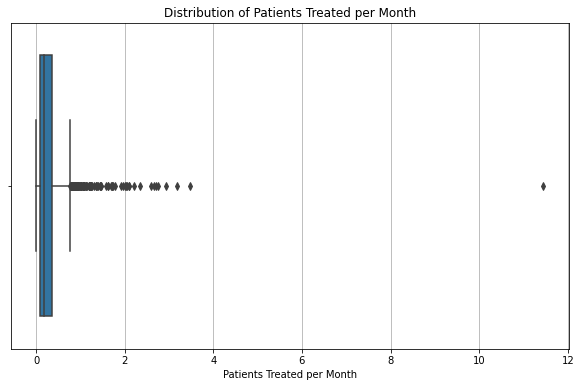

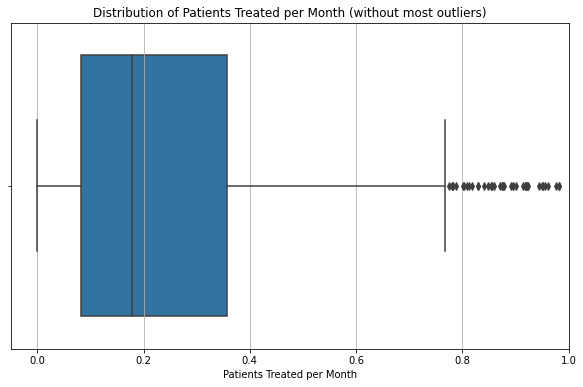

In [75]:
# Calculate patients treated per month
df_merged['patients_treated_per_month'] = df_merged['no_of_patients'] / df_merged['site_trial_duration_months']

# Drop NA values for visualization purposes
df_merged_clean = df_merged.dropna(subset=['patients_treated_per_month'])

# Plot distribution of patients_treated_per_month
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged_clean, x="patients_treated_per_month", orient='h')
plt.title('Distribution of Patients Treated per Month')
plt.xlabel('Patients Treated per Month')
plt.grid(axis='x')
plt.show()

# Plot distribution of patients_treated_per_month
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged_clean, x="patients_treated_per_month", orient='h')
plt.title('Distribution of Patients Treated per Month (without most outliers)')
plt.xlabel('Patients Treated per Month')
plt.grid(axis='x')
# Restrict the x-axis to eliminate outliers
plt.xlim(-0.05, 1)
plt.show()

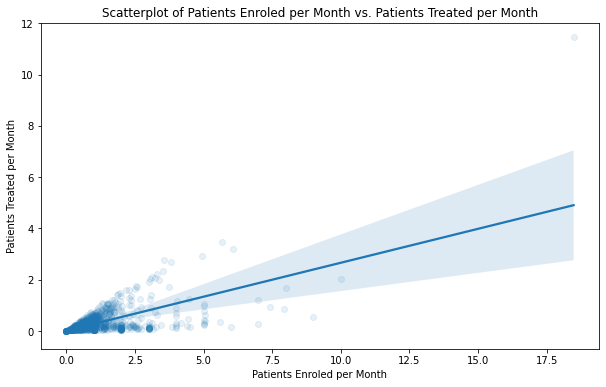

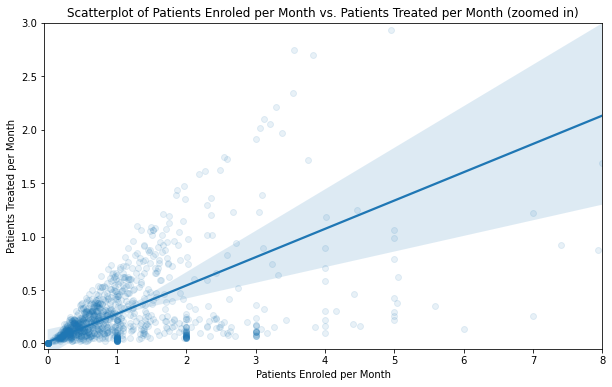

In [74]:
# Plot scatterplot between patients_enroled_per_month and patients_treated_per_month
plt.figure(figsize=(10, 6))
sns.regplot(data=df_merged, x='patients_enroled_per_month', y='patients_treated_per_month',
            scatter_kws=dict(alpha=0.1))
plt.title('Scatterplot of Patients Enroled per Month vs. Patients Treated per Month')
plt.xlabel('Patients Enroled per Month')
plt.ylabel('Patients Treated per Month')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=df_merged, x='patients_enroled_per_month', y='patients_treated_per_month',
            scatter_kws=dict(alpha=0.1))
plt.title('Scatterplot of Patients Enroled per Month vs. Patients Treated per Month (zoomed in)')
plt.xlabel('Patients Enroled per Month')
plt.ylabel('Patients Treated per Month')
plt.xlim(-0.05, 8)
plt.ylim(-0.05, 3)
plt.show()

In [81]:
df_merged

,trial_id,site_id,country_id,site_start_date,site_end_date,site_type,site_trial_duration_months,no_of_patients,enrolment_months,no_of_patients_per_month,patients_enroled_per_month,patients_treated_per_month
0,0,0,DEU,2017-01-30,2019-04-15,Practitioner,26.445466,1.0,0.228995,1.000000,1.000000,0.037814
1,1,1,BRA,2018-05-07,2022-04-03,Other,46.879106,20.0,NaN,NaN,NaN,0.426629
2,1,2,TWN,2018-04-29,2022-03-26,Academic,46.879106,31.0,NaN,NaN,NaN,0.661275
3,1,3,USA,2018-05-07,2020-02-04,Practitioner,20.959264,7.0,13.576580,0.515594,0.515594,0.333981
4,2,4,ISR,2018-04-22,2020-06-26,Academic,26.149803,3.0,13.556150,0.221302,0.221302,0.114724
...,...,...,...,...,...,...,...,...,...,...,...,...
1243,1,1063,POL,2018-04-24,2022-03-21,Practitioner,46.879106,68.0,NaN,NaN,NaN,1.450540
1244,4,1064,ARG,2013-05-28,2017-02-06,Other,44.349540,4.0,4.927081,0.811840,0.811840,0.090193
1245,6,1065,ROU,2016-08-31,2019-11-20,Other,38.633377,2.0,0.039459,2.000000,2.000000,0.051769
1246,5,1066,USA,2019-11-14,2020-07-09,Other,7.818660,1.0,0.083982,1.000000,1.000000,0.127899


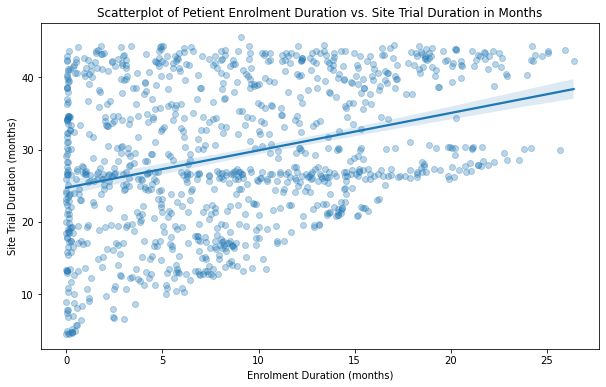

In [85]:
# Plot scatterplot between enrolment_months and site_trial_duration_months
plt.figure(figsize=(10, 6))
sns.regplot(data=df_merged, x='enrolment_months', y='site_trial_duration_months',
            scatter_kws=dict(alpha=0.3))
plt.title('Scatterplot of Petient Enrolment Duration vs. Site Trial Duration in Months')
plt.xlabel('Enrolment Duration (months)')
plt.ylabel('Site Trial Duration (months)')
plt.show()

### Correlations

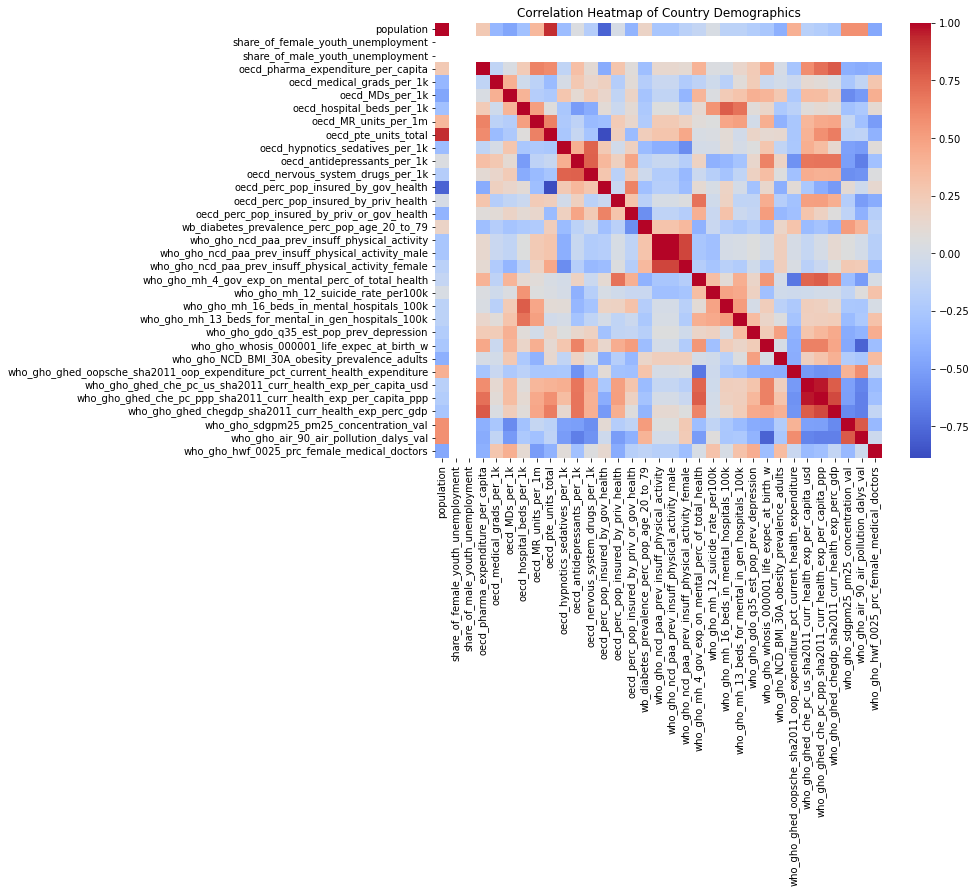

In [76]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix_country = df_country.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix_country, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Country Demographics')
plt.show()


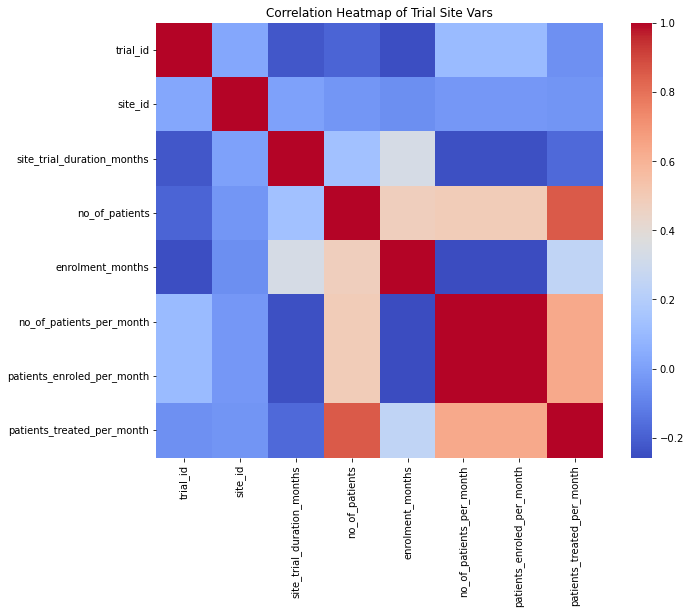

In [78]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix_trial_site = df_merged_clean.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix_trial_site, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Trial Site Vars')
plt.show()

## Response Variables: Predicting Site Quality 

In [ ]:
# Standardize the variables
scaler = StandardScaler()
df_merged_scaled = pd.DataFrame()
df_merged_scaled[['no_of_patients', 'patients_enroled_per_month', 'patients_treated_per_month']] = scaler.fit_transform(df_merged_clean[['no_of_patients', 'patients_enroled_per_month', 'patients_treated_per_month']])

# Assuming equal weights for simplicity
df_merged_scaled['site_quality_score'] = (
    df_merged_scaled['no_of_patients'] +
    df_merged_scaled['patients_enroled_per_month'] +
    df_merged_scaled['patients_treated_per_month']
) / 3

